<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%B0%95%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 준비

In [1]:
# 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,737 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

In [ ]:
# 한글깨짐 방지(2) - 런타임 재시작 유도 코드 (session crashed 메세지창 무시)
import os
os.kill(os.getpid(), 9)

In [1]:
# 필요한 라이브러리 & 기본 세팅
import numpy as np
import pandas as pd
# 소수점 아래 한자리 수까지 표시
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 로드
## read_csv 할 때부터 datetime object로 읽어들이기
train = pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/movies_train.csv', sep = ',', parse_dates = ['release_time'])
test = pd.read_csv('https://raw.githubusercontent.com/jparkgit/ESAA-23-2/main/movies_test.csv', sep = ',', parse_dates = ['release_time'])

# EDA

Dataset 내용
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [ ]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


## 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778


In [ ]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,nan,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,nan,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,nan,0,117,5


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [3]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

# 박지현

## (0) 데이터 열 추가: 연도, 월, 분기, 반기, 계절

분기 (quarter)
*   1/4분기: 1,2,3월
*   2/4분기: 4,5,6월
*   3/4분기: 7,8,9월
*   4/4분기: 10,11,12월



반기 (half-year)
*   상반기: 1,2,3,4,5,6월
*   하반기: 7,8,9,10,11,12월



[계절](https://namu.wiki/w/%EA%B3%84%EC%A0%88#s-5)
*   봄: 3,4,5월
*   여름: 6,7,8월
*   가을: 9,10,11월
*   겨울: 12,1,2월





In [4]:
# 월, 년도 열 생성
train['release_year'] = train['release_time'].dt.year
train['release_month'] = train['release_time'].dt.month
# 반기 열 half-year 생성
train['half-year'] = ['상반기' if x <= 6 else '하반기' for x in train['release_month']]
# 분기 열 quarter 생성 season
q_conditions = [
    (train['release_month'] <= 3),
    (train['release_month'] > 3) & (train['release_month'] <= 6),
    (train['release_month'] > 6) & (train['release_month'] <= 9),
    (train['release_month'] > 9)
    ]
q_list = [1,2,3,4]
train['quarter'] = np.select(q_conditions, q_list)
# 계절 열 season 생성
s_conditions = [
    (train['release_month'] <= 2),
    (train['release_month'] > 2) & (train['release_month'] <= 5),
    (train['release_month'] > 5) & (train['release_month'] <= 8),
    (train['release_month'] > 8) & (train['release_month'] <= 11),
    (train['release_month'] == 12)
    ]
s_list = ['겨울','봄', '여름', '가을', '겨울']
train['season'] = np.select(s_conditions, s_list)
# display updated dataframe
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,half-year,quarter,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.000,0,91,2,23398,2012,11,하반기,4,가을
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.500,2,387,3,7072501,2015,11,하반기,4,가을
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.250,4,343,4,6959083,2013,6,상반기,2,여름
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.000,2,20,6,217866,2012,7,하반기,3,여름
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000,1,251,2,483387,2010,11,하반기,4,가을


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  release_year    600 non-null    int64         
 13  release_month   600 non-null    int64         
 14  half-year       600 non-null    object        
 15  quarte

## (1) 연도별

### 1.1. 연도별 영화 관객수

In [ ]:
year_num_sum = train[['release_year','box_off_num']].groupby('release_year').sum()
year_num_sum.reset_index(inplace=True)
year_num_mean = train[['release_year','box_off_num']].groupby('release_year').mean()
year_num_mean.reset_index(inplace=True)
year_num_sum_ordered = train[['release_year','box_off_num']].groupby('release_year').sum().sort_values('box_off_num',ascending=False)
year_num_sum_ordered.reset_index(inplace=True)
year_num_mean_ordered = train[['release_year','box_off_num']].groupby('release_year').mean().sort_values('box_off_num',ascending=False)
year_num_mean_ordered.reset_index(inplace=True)

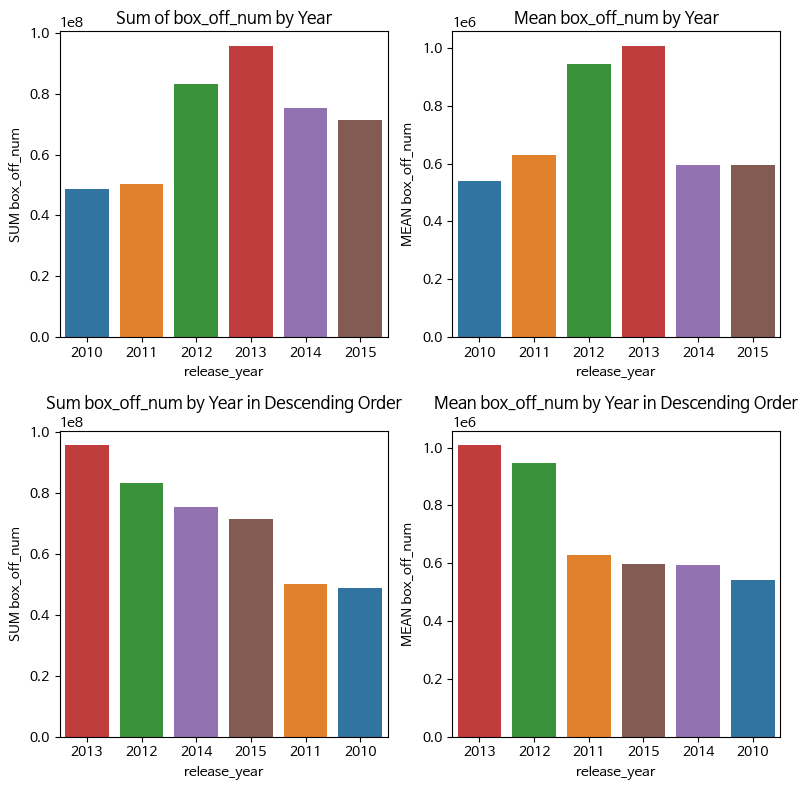

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(8)
fig.set_figheight(8)
bar1 = sns.barplot(data=year_num_sum, x="release_year", y="box_off_num",
                   dodge=False, hue = "release_year", ax=axs[0,0])
bar1.legend_.remove()
bar2 = sns.barplot(data=year_num_mean, x="release_year", y="box_off_num",
                   dodge=False, hue = "release_year", ax=axs[0,1])
bar2.legend_.remove()
bar3 = sns.barplot(data=year_num_sum_ordered, x="release_year", y="box_off_num",
                   dodge=False, hue = "release_year", ax=axs[1,0],
                   order = year_num_sum_ordered['release_year'])
bar3.legend_.remove()
bar4 = sns.barplot(data=year_num_mean_ordered, x="release_year", y="box_off_num",
                   dodge=False, hue = "release_year", ax=axs[1,1],
                   order = year_num_mean_ordered['release_year'])
bar4.legend_.remove()
bar1.set(ylabel = "SUM box_off_num", title = "Sum of box_off_num by Year")
bar2.set(ylabel = "MEAN box_off_num", title = "Mean box_off_num by Year")
bar3.set(ylabel = "SUM box_off_num", title = "Sum box_off_num by Year in Descending Order")
bar4.set(ylabel = "MEAN box_off_num", title = "Mean box_off_num by Year in Descending Order")
plt.tight_layout()
plt.show()

2x2로 총 4개의 그래프를 출력했다.\
세로로 보면 첫번째 열은 한 해의 총관객수, 즉 각 해의 box_off_num의 sum을 연도별로 그린 것이고, 두번째 열은 한 해 동안 개봉한 영화들의 관객수의 평균을 각 해마다 그린 것이다.\
가로로 보면 첫번째 행은 개봉연도를 순차적으로 나타낸 것이고, 두번째 행은 y축에 따라 (총/평균 관객수) 내림차순으로 줄세운 것이다.\
2013년이 관객수가 가장 많았고 2010년은 관객수가 가장 적었다.\
첫번째 행 내에서 비교해보면 총과 평균 관객수는 크게 경향성이 다르지 않은 걸 알 수 있다.\
두번째 행 내에서 비교해보면 2014년과 2011년의 위치가 바뀐 것을 알아차릴 수 있다. 2014년은 총 관객수는 높았지만 평균 관객수는 낮았다.

### 1.2 연도별 개봉 영화 수와 관객수 비교
한 해의 총 관객수와 개봉 영화수를 비교해보자.

In [ ]:
groupbyy = train.groupby('release_year').sum()
groupbyy['count'] = train.groupby('release_year').count()['title']
groupbyy.reset_index(inplace=True)
groupbyy = groupbyy[['release_year','box_off_num','count']]
groupbyy

<ipython-input-7-e2dc244112f1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupbyy = train.groupby('release_year').sum()


,release_year,box_off_num,count
0,2010,48749235,90
1,2011,50309371,80
2,2012,83223817,88
3,2013,95698992,95
4,2014,75423331,127
5,2015,71504305,120


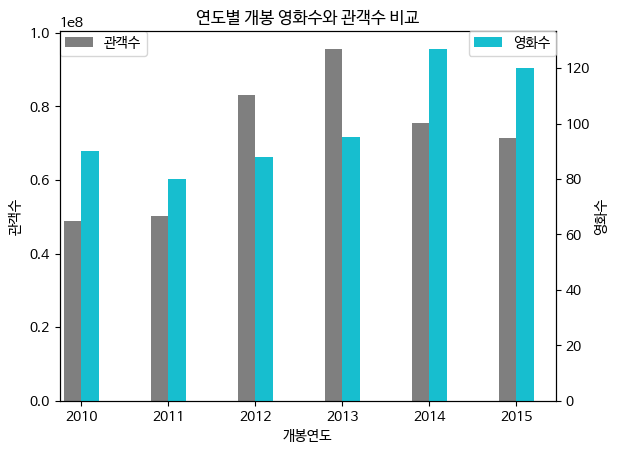

In [ ]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

bar1 = groupbyy.plot(kind='bar', x = 'release_year', y = 'box_off_num',
                     color='tab:gray', ax=ax, width=width, position=1,
                     label = '관객수',rot=0 )
bar2 = groupbyy.plot(kind='bar', x = 'release_year', y = 'count',
                     color='tab:cyan', ax=ax2, width=width, position=0,
                     label = '영화수')


ax.set_xlabel('개봉연도')
ax.set_ylabel('관객수')
ax.legend(loc='upper left', borderaxespad=0)
ax2.set_ylabel('영화수')
ax2.legend(loc='upper right', borderaxespad=0)
plt.title('연도별 개봉 영화수와 관객수 비교')
plt.show()

#### 관객수 내림차순
관계를 더 쉽게 보기 위해 관객수를 내림차순으로 연도를 나열했을 때에 개봉 영화수는 어떤지 보자.

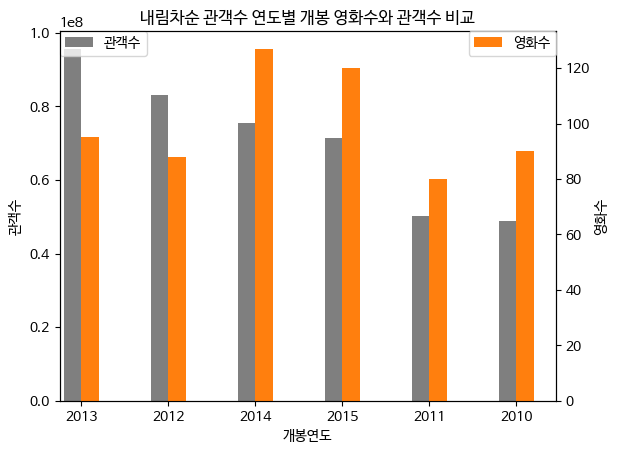

In [ ]:
groupbyy_ordered = groupbyy.sort_values('box_off_num',ascending=False)

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

bar1 = groupbyy_ordered.plot(kind='bar', x = 'release_year', y = 'box_off_num',
                     color='tab:gray', ax=ax, width=width, position=1,
                     label = '관객수',rot=0 )
bar2 = groupbyy_ordered.plot(kind='bar', x = 'release_year', y = 'count',
                     color='tab:orange', ax=ax2, width=width, position=0,
                     label = '영화수')


ax.set_xlabel('개봉연도')
ax.set_ylabel('관객수')
ax.legend(loc='upper left', borderaxespad=0)
ax2.set_ylabel('영화수')
ax2.legend(loc='upper right', borderaxespad=0)
plt.title('내림차순 관객수 연도별 개봉 영화수와 관객수 비교')
plt.show()

관객수는 내려갈 때 개봉 영화수는 눈에 보이는 경향이 없다.

## (2) 월별

### 2.1 월별 영화 관객수

In [ ]:
month_num_sum = train[['release_month','box_off_num']].groupby('release_month').sum()
month_num_sum.reset_index(inplace=True)
month_num_mean = train[['release_month','box_off_num']].groupby('release_month').mean()
month_num_mean.reset_index(inplace=True)
month_num_sum_ordered = train[['release_month','box_off_num']].groupby('release_month').sum().sort_values('box_off_num',ascending=False)
month_num_sum_ordered.reset_index(inplace=True)
month_num_mean_ordered = train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num',ascending=False)
month_num_mean_ordered.reset_index(inplace=True)

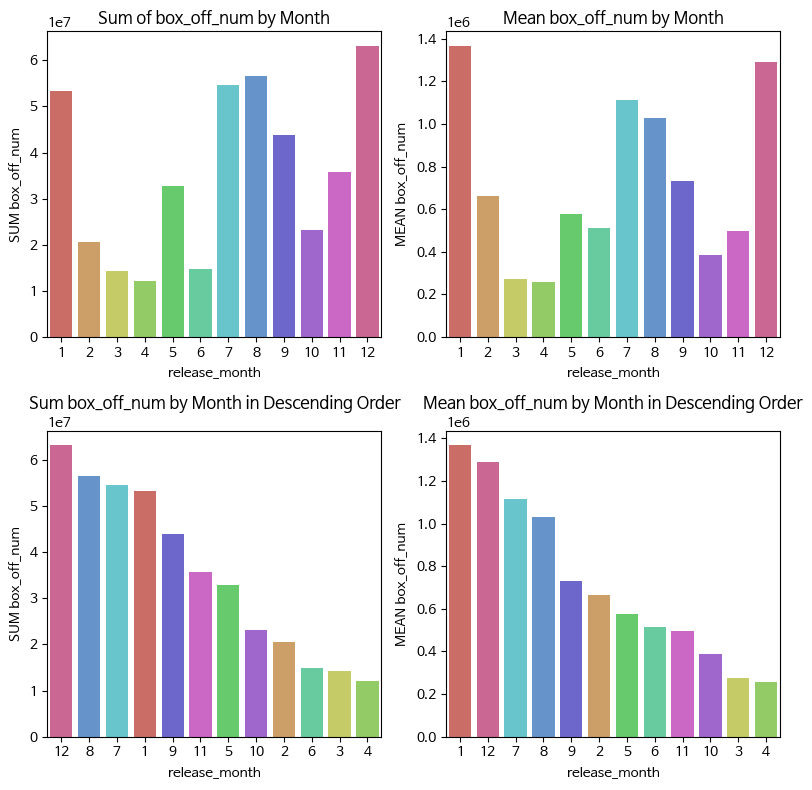

In [ ]:
palette = sns.color_palette('hls', len(month_num_sum.release_month.unique()))
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(8)
fig.set_figheight(8)
bar1 = sns.barplot(data=month_num_sum, x="release_month", y="box_off_num",
                   dodge=False, hue = "release_month", palette = palette, ax=axs[0,0])
bar1.legend_.remove()
bar2 = sns.barplot(data=month_num_mean, x="release_month", y="box_off_num",
                   dodge=False, hue = "release_month", palette = palette, ax=axs[0,1])
bar2.legend_.remove()
bar3 = sns.barplot(data=month_num_sum_ordered, x="release_month", y="box_off_num",
                   dodge=False, hue = "release_month", palette = palette, ax=axs[1,0],
                   order = month_num_sum_ordered['release_month'])
bar3.legend_.remove()
bar4 = sns.barplot(data=month_num_mean_ordered, x="release_month", y="box_off_num",
                   dodge=False, hue = "release_month", palette = palette, ax=axs[1,1],
                   order = month_num_mean_ordered['release_month'])
bar4.legend_.remove()

bar1.set(ylabel = "SUM box_off_num", title = "Sum of box_off_num by Month")
bar2.set(ylabel = "MEAN box_off_num", title = "Mean box_off_num by Month")
bar3.set(ylabel = "SUM box_off_num", title = "Sum box_off_num by Month in Descending Order")
bar4.set(ylabel = "MEAN box_off_num", title = "Mean box_off_num by Month in Descending Order")
plt.tight_layout()
plt.show()

연도별 때 그린 그래프와 똑같은 방식으로 2x2로 그렸다.\
순서는 다르지만 총과 평균 관객수 모두 연말 12월과 연초 1월, 그리고 여름방학/휴가시기인 7,8월에 가장 높다.\
그리고 3,4월에 가장 낮다.


### 2.2 월별 총관객수로 내림차순했을 때의 개봉 영화수

In [ ]:
groupbym = train.groupby('release_month').sum()
groupbym['count'] = train.groupby('release_month').count()['title']
groupbym.reset_index(inplace=True)
groupbym = groupbym[['release_month','box_off_num','count']]
groupbym_ordered = groupbym.sort_values('box_off_num',ascending=False)
groupbym_ordered

<ipython-input-12-42978ee4d984>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupbym = train.groupby('release_month').sum()


,release_month,box_off_num,count
11,12,63124139,49
7,8,56603892,55
6,7,54576555,49
0,1,53271292,39
8,9,43891718,60
10,11,35687080,72
4,5,32814059,57
9,10,23154249,60
1,2,20553781,31
5,6,14856308,29


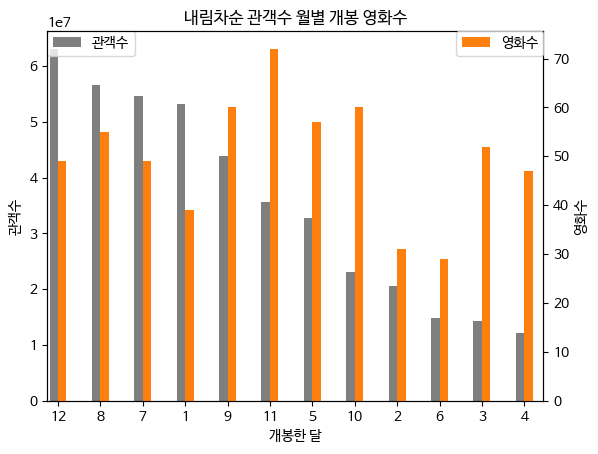

In [ ]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

bar1 = groupbym_ordered.plot(kind='bar', x = 'release_month', y = 'box_off_num',
                     color='tab:gray', ax=ax, width=width, position=1,
                     label = '관객수',rot=0 )
bar2 = groupbym_ordered.plot(kind='bar', x = 'release_month', y = 'count',
                     color='tab:orange', ax=ax2, width=width, position=0,
                     label = '영화수')
ax.set_xlabel('개봉한 달')
ax.set_ylabel('관객수')
ax.legend(loc='upper left', borderaxespad=0)
ax2.set_ylabel('영화수')
ax2.legend(loc='upper right', borderaxespad=0)
plt.title('내림차순 관객수 월별 개봉 영화수')
plt.show()

월별 관객수로 내림차순하니 관객수 1,2위인 12,8월의 개봉 영화수가 관객수 꼴찌인 3,4월의 개봉 영화수와 비슷하다는 것이 눈에 띈다.\
이는 영화를 많이 개봉한다고, 볼 영화가 많다고 관객이 많이 누적되는 것이 아니라 영화를 보기 좋은 시기인 것이 중요하다는 것을 짐작해볼 수 있다.

## (3) 계절별

#### 3.1 계절별 총관객수로 내림차순했을 때의 개봉 영화 수

In [ ]:
groupbys = train.groupby('season').sum()
groupbys['count'] = train.groupby('season').count()['title']
groupbys.reset_index(inplace=True)
groupbys = groupbys[['season','box_off_num','count']]
groupbys_ordered = groupbys.sort_values('box_off_num',ascending=False)
groupbys_ordered

<ipython-input-14-7ab0b982bc17>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupbys = train.groupby('season').sum()


,season,box_off_num,count
1,겨울,136949212,119
3,여름,126036755,133
0,가을,102733047,192
2,봄,59190037,156


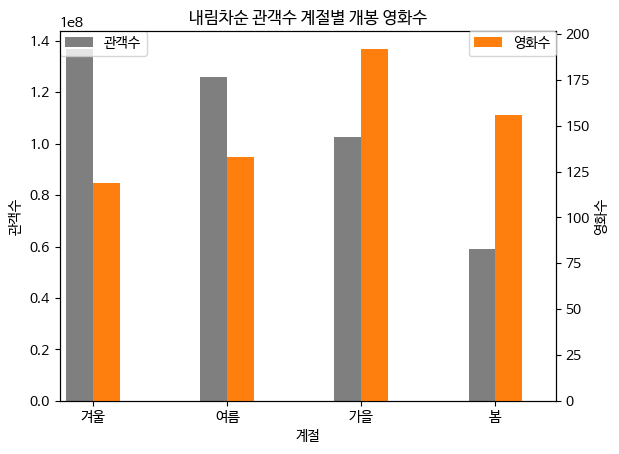

In [ ]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

bar1 = groupbys_ordered.plot(kind='bar', x = 'season', y = 'box_off_num',
                     color='tab:gray', ax=ax, width=width, position=1,
                     label = '관객수', rot=0)
bar2 = groupbys_ordered.plot(kind='bar', x = 'season', y = 'count',
                     color='tab:orange', ax=ax2, width=width, position=0,
                     label = '영화수')

ax.set_xlabel('계절')
ax.set_ylabel('관객수')
ax.legend(loc='upper left', borderaxespad=0)
ax2.set_ylabel('영화수')
ax2.legend(loc='upper right', borderaxespad=0)
plt.title('내림차순 관객수 계절별 개봉 영화수')
plt.show()

봄에 영화개봉수가 제일 많은 것이 아니라는 것만 제외하면 관객수와 영화개봉수가 거의 서로 반대되는 관계에 있다고 생각해볼 수 있다.

## (4) 분기별

### 4.1 분기별 개봉 영화 수와 관객수 비교

In [ ]:
groupbyq = train.groupby('quarter').sum()
groupbyq['count'] = train.groupby('quarter').count()['title']
groupbyq.reset_index(inplace=True)
groupbyq = groupbyq[['quarter','box_off_num','count']]
groupbyq_ordered = groupbyq.sort_values('box_off_num',ascending=False)
groupbyq_ordered

<ipython-input-16-5adf98fc0180>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupbyq = train.groupby('quarter').sum()


,quarter,box_off_num,count
2,3,155072165,164
3,4,121965468,181
0,1,88067216,122
1,2,59804202,133


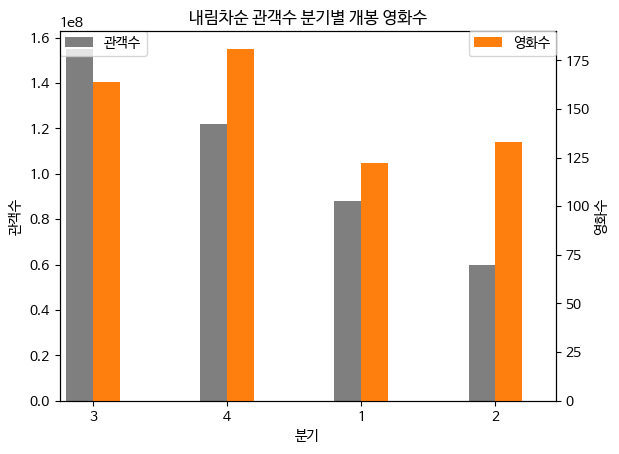

In [ ]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

bar1 = groupbyq_ordered.plot(kind='bar', x = 'quarter', y = 'box_off_num',
                     color='tab:gray', ax=ax, width=width, position=1,
                     label = '관객수', rot=0)
bar2 = groupbyq_ordered.plot(kind='bar', x = 'quarter', y = 'count',
                     color='tab:orange', ax=ax2, width=width, position=0,
                     label = '영화수')

ax.set_xlabel('분기')
ax.set_ylabel('관객수')
ax.legend(loc='upper left', borderaxespad=0)
ax2.set_ylabel('영화수')
ax2.legend(loc='upper right', borderaxespad=0)
plt.title('내림차순 관객수 분기별 개봉 영화수')
plt.show()

3분기에 영화개봉수와 관객수가 모두 높은 것 외에는 특별한 경향이 보이지 않는다.

## (5) 장르

### 5.1 상위 n 장르 데이터프레임 생성
관심있는 시기별로 장르를 개봉 영화수 또는 관객수의 상위 장르 n개의 장르와 나머지는 "그 외" 장르로 지정한 정보를 담은 topngenre 열이 있는 데이터프레임 생성

In [ ]:
def topngenre(data):
  if data['genre'] in topnlist:
    return data['genre']
  else:
    return '그 외'

#### 5.1.3. trainy (연도별)

In [ ]:
release_years_list = train.release_year.unique().tolist( )
# top n genres & others
n = 3

year = release_years_list[0]
temp = train[train['release_year'] == year]
sort = temp.groupby('genre').count()['title'].sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp0 = temp.copy()
temp0['topngenre_y'] = temp0.apply(topngenre, axis=1)


year = release_years_list[1]
temp = train[train['release_year'] == year]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp1 = temp.copy()
temp1['topngenre_y'] = temp1.apply(topngenre, axis=1)


year = release_years_list[2]
temp = train[train['release_year'] == year]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp2 = temp.copy()
temp2['topngenre_y'] = temp2.apply(topngenre, axis=1)


year = release_years_list[3]
temp = train[train['release_year'] == year]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp3 = temp.copy()
temp3['topngenre_y'] = temp3.apply(topngenre, axis=1)



year = release_years_list[4]
temp = train[train['release_year'] == year]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp4 = temp.copy()
temp4['topngenre_y'] = temp4.apply(topngenre, axis=1)



year = release_years_list[5]
temp = train[train['release_year'] == year]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp5 = temp.copy()
temp5['topngenre_y'] = temp5.apply(topngenre, axis=1)


frames = [temp0, temp1, temp2, temp3, temp4, temp5]
trainy = pd.concat(frames)
trainy.sort_index(inplace=True)
trainy.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,half-year,quarter,season,topngenre_y
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.000,0,91,2,23398,2012,11,하반기,4,가을,그 외
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.500,2,387,3,7072501,2015,11,하반기,4,가을,느와르
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.250,4,343,4,6959083,2013,6,상반기,2,여름,액션
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.000,2,20,6,217866,2012,7,하반기,3,여름,코미디
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000,1,251,2,483387,2010,11,하반기,4,가을,코미디


#### 5.1.2 trains (계절별)

In [ ]:
seasons_list = train.season.unique().tolist( )
# top n genres & others
n = 3
season = seasons_list[0]
temp = train[train['season'] ==season]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp0 = temp.copy()
temp0['topngenre_s'] = temp0.apply(topngenre, axis=1)
#df1.join(df2)

season = seasons_list[1]
temp = train[train['season'] ==season]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp1 = temp.copy()
temp1['topngenre_s'] = temp1.apply(topngenre, axis=1)

season = seasons_list[2]
temp = train[train['season'] ==season]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp2 = temp.copy()
temp2['topngenre_s'] = temp2.apply(topngenre, axis=1)

season = seasons_list[3]
temp = train[train['season'] ==season]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp3 = temp.copy()
temp3['topngenre_s'] = temp3.apply(topngenre, axis=1)


frames = [temp0, temp1, temp2, temp3]
trains = pd.concat(frames)
trains.sort_index(ascending=True, inplace=True)
trains.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,half-year,quarter,season,topngenre_s
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.000,0,91,2,23398,2012,11,하반기,4,가을,액션
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.500,2,387,3,7072501,2015,11,하반기,4,가을,느와르
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.250,4,343,4,6959083,2013,6,상반기,2,여름,액션
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.000,2,20,6,217866,2012,7,하반기,3,여름,그 외
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000,1,251,2,483387,2010,11,하반기,4,가을,그 외


#### 5.1.3 trainh (반기별)

In [ ]:
half_list = train['half-year'].unique().tolist( )
# top n genres & others
n = 4

half = half_list[0]
temp = train[train['half-year'] == half]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp0 = temp.copy()
temp0['topngenre_h'] = temp0.apply(topngenre, axis=1)


half = half_list[1]
temp = train[train['half-year'] == half]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp1 = temp.copy()
temp1['topngenre_h'] = temp1.apply(topngenre, axis=1)



frames = [temp0, temp1]
trainh = pd.concat(frames)
trainh.sort_index(ascending=True, inplace=True)
trainh.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,half-year,quarter,season,topngenre_h
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.000,0,91,2,23398,2012,11,하반기,4,가을,액션
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.500,2,387,3,7072501,2015,11,하반기,4,가을,느와르
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.250,4,343,4,6959083,2013,6,상반기,2,여름,액션
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.000,2,20,6,217866,2012,7,하반기,3,여름,그 외
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000,1,251,2,483387,2010,11,하반기,4,가을,그 외


#### 5.1.4 trainq (분기별)

In [ ]:
quarters_list = train.quarter.unique().tolist( )
# top n genres & others
n = 3

quarter = quarters_list[0]
temp = train[train['quarter'] ==quarter]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp0 = temp.copy()
temp0['topngenre_q'] = temp0.apply(topngenre, axis=1)

quarter = quarters_list[1]
temp = train[train['quarter'] ==quarter]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp1 = temp.copy()
temp1['topngenre_q'] = temp1.apply(topngenre, axis=1)

quarter = quarters_list[2]
temp = train[train['quarter'] ==quarter]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp2 = temp.copy()
temp2['topngenre_q'] = temp2.apply(topngenre, axis=1)

quarter = quarters_list[3]
temp = train[train['quarter'] ==quarter]
sort = temp.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
topnlist = sort.to_frame().reset_index().head(n)['genre'].tolist()
temp3 = temp.copy()
temp3['topngenre_q'] = temp3.apply(topngenre, axis=1)

frames = [temp0, temp1, temp2, temp3]
trainq = pd.concat(frames)
trainq.sort_index(ascending=True, inplace=True)
trainq.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,half-year,quarter,season,topngenre_q
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.000,0,91,2,23398,2012,11,하반기,4,가을,그 외
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.500,2,387,3,7072501,2015,11,하반기,4,가을,느와르
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.250,4,343,4,6959083,2013,6,상반기,2,여름,액션
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.000,2,20,6,217866,2012,7,하반기,3,여름,그 외
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000,1,251,2,483387,2010,11,하반기,4,가을,그 외


### 5.2 개봉하는 영화들의 장르

#### 연도별

In [ ]:
yeargenre_count = train.groupby(['genre','release_year']).count()['title'].reset_index()
yeargenre_count

,genre,release_year,title
0,SF,2010,1
1,SF,2011,3
2,SF,2012,1
3,SF,2013,2
4,SF,2014,2
...,...,...,...
59,코미디,2011,5
60,코미디,2012,12
61,코미디,2013,4
62,코미디,2014,11


In [ ]:
yeargenre_count_pivot = pd.pivot_table(data=yeargenre_count, index=['release_year'], columns=['genre'], values='title')
yeargenre_count_pivot

genre,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
release_year,,,,,,,,,,,,
2010,1.000,9.000,5.000,14.000,36.000,11.000,NaN,NaN,NaN,NaN,2.000,12.000
2011,3.000,3.000,2.000,13.000,31.000,7.000,2.000,1.000,NaN,6.000,7.000,5.000
2012,1.000,3.000,4.000,13.000,35.000,9.000,NaN,4.000,NaN,2.000,5.000,12.000
2013,2.000,8.000,4.000,15.000,36.000,12.000,1.000,5.000,1.000,1.000,6.000,4.000
2014,2.000,8.000,5.000,23.000,47.000,18.000,1.000,3.000,1.000,7.000,1.000,11.000
2015,4.000,11.000,7.000,15.000,36.000,21.000,1.000,4.000,NaN,5.000,7.000,9.000


In [ ]:
yg_pivot_list = yeargenre_count_pivot.sum(axis=0).sort_values(ascending = False).index.tolist()
yg_pivot = yeargenre_count_pivot.reindex(columns = yg_pivot_list)
yg_pivot

genre,드라마,다큐멘터리,멜로/로맨스,코미디,공포,액션,느와르,애니메이션,미스터리,SF,뮤지컬,서스펜스
release_year,,,,,,,,,,,,
2010,36.000,14.000,11.000,12.000,9.000,2.000,5.000,NaN,NaN,1.000,NaN,NaN
2011,31.000,13.000,7.000,5.000,3.000,7.000,2.000,6.000,1.000,3.000,2.000,NaN
2012,35.000,13.000,9.000,12.000,3.000,5.000,4.000,2.000,4.000,1.000,NaN,NaN
2013,36.000,15.000,12.000,4.000,8.000,6.000,4.000,1.000,5.000,2.000,1.000,1.000
2014,47.000,23.000,18.000,11.000,8.000,1.000,5.000,7.000,3.000,2.000,1.000,1.000
2015,36.000,15.000,21.000,9.000,11.000,7.000,7.000,5.000,4.000,4.000,1.000,NaN


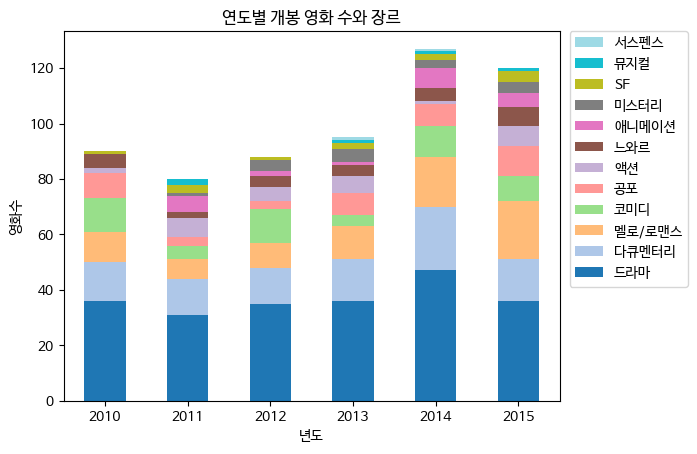

In [ ]:
ax = yg_pivot.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('년도')
plt.xticks(rotation=0)
plt.ylabel('영화수')
plt.title('연도별 개봉 영화 수와 장르')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### 연도별 점유율

In [ ]:
year_prop = yg_pivot.copy()
year_prop = year_prop.apply(lambda x: x/x.sum(), axis=1)
year_prop

genre,드라마,다큐멘터리,멜로/로맨스,코미디,공포,액션,느와르,애니메이션,미스터리,SF,뮤지컬,서스펜스
release_year,,,,,,,,,,,,
2010,0.400,0.156,0.122,0.133,0.100,0.022,0.056,NaN,NaN,0.011,NaN,NaN
2011,0.388,0.163,0.087,0.062,0.037,0.087,0.025,0.075,0.013,0.037,0.025,NaN
2012,0.398,0.148,0.102,0.136,0.034,0.057,0.045,0.023,0.045,0.011,NaN,NaN
2013,0.379,0.158,0.126,0.042,0.084,0.063,0.042,0.011,0.053,0.021,0.011,0.011
2014,0.370,0.181,0.142,0.087,0.063,0.008,0.039,0.055,0.024,0.016,0.008,0.008
2015,0.300,0.125,0.175,0.075,0.092,0.058,0.058,0.042,0.033,0.033,0.008,NaN


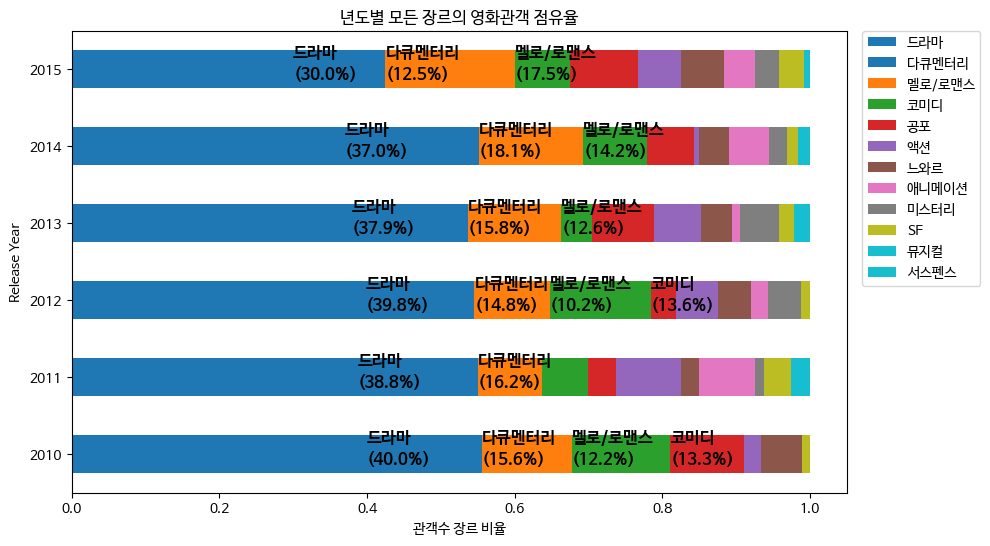

In [ ]:
year_prop.plot(kind='barh', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Release Year")
plt.xlabel("관객수 장르 비율")
# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
for n, x in enumerate([*yg_pivot.index.values]):
    for (proportion, y_loc, label) in zip(year_prop.loc[x],
                                                 year_prop.loc[x].cumsum(),
                                                 legend_labels):
      #labels =
      plt.text(x= y_loc,
              y=n - 0.12,
              s=f'{label}\n({np.round(proportion * 100, 1)}%)'
                if proportion > 0.1
                else '',
              color="black",
              fontsize=12,
              fontweight="bold")
plt.title('년도별 모든 장르의 영화관객 점유율')
plt.show()

각 해 개봉하는 영화의 장르 비율이 모든 년도에 비슷하다.\
비율은 살짝씩 다르지만 점유율의 순위는 거의 같다.\
드라마가 최소 30에서 40%로 제일 크고, 그 다음이 다큐멘터리, 그 다음이 멜로/로맨스고 코미디다.\
개봉 영화수는 이렇지만 관객수에 따라 점유율을 보면 드라마가 꽤 적다. (이후 5.4 섹션에서 확인할 수 있다.)

#### 계절별

In [ ]:
seasongenre_count = train.groupby(['genre','season']).count()['title'].reset_index()
seasongenre_count

,genre,season,title
0,SF,가을,1
1,SF,겨울,2
2,SF,봄,3
3,SF,여름,7
4,공포,가을,12
5,공포,겨울,4
6,공포,봄,6
7,공포,여름,20
8,느와르,가을,5
9,느와르,겨울,8


In [ ]:
seasongenre_count_pivot = pd.pivot_table(data=seasongenre_count, index=['season'], columns=['genre'], values='title')
seasongenre_count_pivot.head()

genre,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
season,,,,,,,,,,,,
가을,1.000,12.000,5.000,27.000,74.000,29.000,4.000,6.000,1.000,5.000,11.000,17.000
겨울,2.000,4.000,8.000,20.000,50.000,13.000,NaN,1.000,NaN,3.000,3.000,15.000
봄,3.000,6.000,8.000,27.000,61.000,26.000,NaN,5.000,1.000,5.000,3.000,11.000
여름,7.000,20.000,6.000,19.000,36.000,10.000,1.000,5.000,NaN,8.000,11.000,10.000


In [ ]:
sg_pivot_list = seasongenre_count_pivot.sum(axis=0).sort_values(ascending = False).index.tolist()
sg_pivot = seasongenre_count_pivot.reindex(columns = sg_pivot_list)
sg_pivot.head()

genre,드라마,다큐멘터리,멜로/로맨스,코미디,공포,액션,느와르,애니메이션,미스터리,SF,뮤지컬,서스펜스
season,,,,,,,,,,,,
가을,74.000,27.000,29.000,17.000,12.000,11.000,5.000,5.000,6.000,1.000,4.000,1.000
겨울,50.000,20.000,13.000,15.000,4.000,3.000,8.000,3.000,1.000,2.000,NaN,NaN
봄,61.000,27.000,26.000,11.000,6.000,3.000,8.000,5.000,5.000,3.000,NaN,1.000
여름,36.000,19.000,10.000,10.000,20.000,11.000,6.000,8.000,5.000,7.000,1.000,NaN


In [ ]:
order = ['봄', '여름', '가을', '겨울']
sg_pivot.loc[order]

genre,드라마,다큐멘터리,멜로/로맨스,코미디,공포,액션,느와르,애니메이션,미스터리,SF,뮤지컬,서스펜스
season,,,,,,,,,,,,
봄,61.000,27.000,26.000,11.000,6.000,3.000,8.000,5.000,5.000,3.000,NaN,1.000
여름,36.000,19.000,10.000,10.000,20.000,11.000,6.000,8.000,5.000,7.000,1.000,NaN
가을,74.000,27.000,29.000,17.000,12.000,11.000,5.000,5.000,6.000,1.000,4.000,1.000
겨울,50.000,20.000,13.000,15.000,4.000,3.000,8.000,3.000,1.000,2.000,NaN,NaN


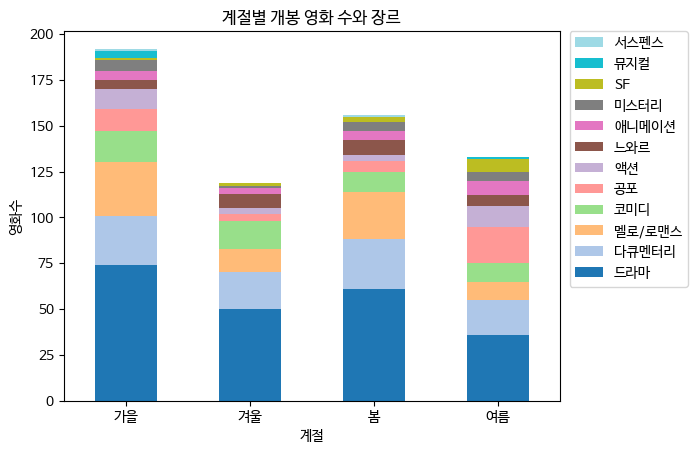

In [ ]:
ax = sg_pivot.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('계절')
plt.xticks(rotation=0)
plt.ylabel('영화수')
plt.title('계절별 개봉 영화 수와 장르')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### 5.3 관객수 상위 n 장르의 관객수

#### 연도별

In [ ]:
pivot = pd.pivot_table(data=trainy, index=['release_year'], columns=['topngenre_y'],
                       values='box_off_num', aggfunc="sum")
pivot

topngenre_y,SF,그 외,느와르,다큐멘터리,드라마,액션,코미디
release_year,,,,,,,
2010,NaN,20572857.000,8175580.000,NaN,10079903.000,NaN,9920895.000
2011,NaN,13130902.000,NaN,NaN,11006226.000,12122977.000,14049266.000
2012,NaN,43480953.000,NaN,52700.000,35363424.000,NaN,4326740.000
2013,NaN,32624945.000,NaN,NaN,31761225.000,17502732.000,13810090.000
2014,8667028.000,18358910.000,NaN,NaN,36198864.000,NaN,12198529.000
2015,NaN,25798006.000,13955683.000,NaN,13867802.000,17882814.000,NaN


In [ ]:
pivot.sum(axis=0).sort_values(ascending = False)

topngenre_y
그 외     153966573.000
드라마     138277444.000
코미디      54305520.000
액션       47508523.000
느와르      22131263.000
SF        8667028.000
다큐멘터리       52700.000
dtype: float64

In [ ]:
# "그 외"를 맨 처음에 나타나게 하고 그 후로는 관객 수 많은 장르 순서대로
pivotsortedlist = pivot.sum(axis=0).sort_values(ascending = False).index.tolist()
print(pivotsortedlist)
pivotsortedlist.remove('그 외')
pivotsortedlist.insert(0, '그 외')
print(pivotsortedlist)

['그 외', '드라마', '코미디', '액션', '느와르', 'SF', '다큐멘터리']
['그 외', '드라마', '코미디', '액션', '느와르', 'SF', '다큐멘터리']


In [ ]:
pivot = pivot.reindex(columns = pivotsortedlist)
pivot

topngenre_y,그 외,드라마,코미디,액션,느와르,SF,다큐멘터리
release_year,,,,,,,
2010,20572857.000,10079903.000,9920895.000,NaN,8175580.000,NaN,NaN
2011,13130902.000,11006226.000,14049266.000,12122977.000,NaN,NaN,NaN
2012,43480953.000,35363424.000,4326740.000,NaN,NaN,NaN,52700.000
2013,32624945.000,31761225.000,13810090.000,17502732.000,NaN,NaN,NaN
2014,18358910.000,36198864.000,12198529.000,NaN,NaN,8667028.000,NaN
2015,25798006.000,13867802.000,NaN,17882814.000,13955683.000,NaN,NaN


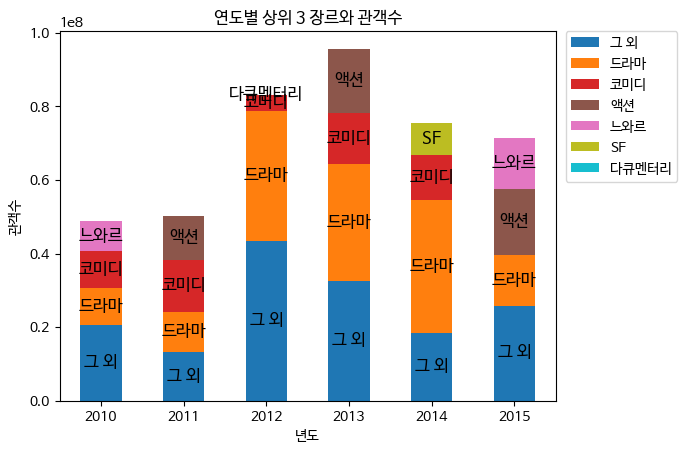

In [ ]:
ax = pivot.plot(kind='bar', stacked=True, colormap='tab10')
plt.xlabel('년도')
plt.xticks(rotation=0)
plt.ylabel('관객수')
plt.title('연도별 상위 3 장르와 관객수')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
# iterate through the zipped containers and legend_labels
for c, l in zip(ax.containers, legend_labels):
  # customize the labels: only plot values greater than 0 and append the legend label
  labels = [f'{l}' if v.get_height() > 0 else '' for v in c]
  # add the bar annotation
  ax.bar_label(c, labels=labels, label_type='center', color='k', fontsize=12)

#### 계절별

In [ ]:
pivot2 = pd.pivot_table(data=trains, index=['season'], columns=['topngenre_s'],
                        values='box_off_num', aggfunc="sum")
pivot2.head()

topngenre_s,SF,그 외,느와르,드라마,멜로/로맨스,액션,코미디
season,,,,,,,
가을,NaN,37163522.000,14327299.000,40415768.000,NaN,10826458.000,NaN
겨울,NaN,21241158.000,12776232.000,62116060.000,NaN,NaN,40815762.000
봄,NaN,19102334.000,NaN,15359359.000,11781617.000,NaN,12946727.000
여름,21089573.000,41170645.000,25523319.000,NaN,NaN,38253218.000,NaN


In [ ]:
pivot2.sum(axis=0).sort_values(ascending = False)

topngenre_s
그 외      118677659.000
드라마      117891187.000
코미디       53762489.000
느와르       52626850.000
액션        49079676.000
SF        21089573.000
멜로/로맨스    11781617.000
dtype: float64

In [ ]:
pivot2sortedlist = pivot2.sum(axis=0).sort_values(ascending = False).index.tolist()
print(pivot2sortedlist)
pivot2sortedlist.remove('그 외')
pivot2sortedlist.insert(0, '그 외')
print(pivot2sortedlist)
#pivotsortedlist = ['그 외', '느와르', 'SF', '코미디', '액션', '드라마', '멜로/로맨스']

['그 외', '드라마', '코미디', '느와르', '액션', 'SF', '멜로/로맨스']
['그 외', '드라마', '코미디', '느와르', '액션', 'SF', '멜로/로맨스']


In [ ]:
pivot2 = pivot2.reindex(columns = pivot2sortedlist)
order = ['봄', '여름', '가을', '겨울']
pivot2 = pivot2.loc[order]

pivot2.head()

topngenre_s,그 외,드라마,코미디,느와르,액션,SF,멜로/로맨스
season,,,,,,,
봄,19102334.000,15359359.000,12946727.000,NaN,NaN,NaN,11781617.000
여름,41170645.000,NaN,NaN,25523319.000,38253218.000,21089573.000,NaN
가을,37163522.000,40415768.000,NaN,14327299.000,10826458.000,NaN,NaN
겨울,21241158.000,62116060.000,40815762.000,12776232.000,NaN,NaN,NaN


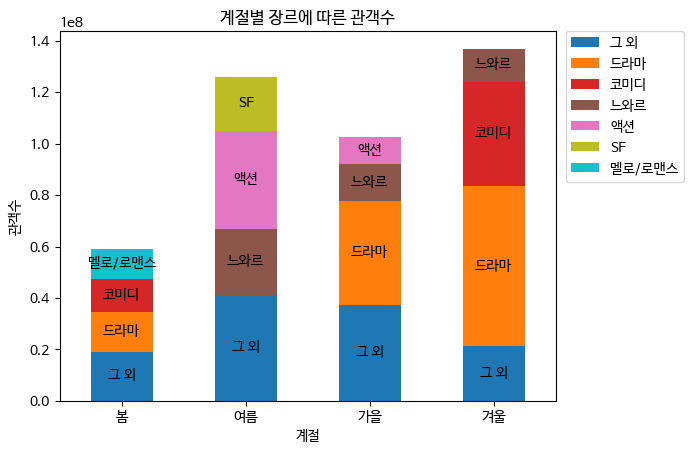

In [ ]:
ax = pivot2.plot(kind='bar', stacked=True, colormap='tab10')
plt.xlabel('계절')
plt.xticks(rotation=0)
plt.ylabel('관객수')
plt.title('계절별 장르에 따른 관객수')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
# iterate through the zipped containers and legend_labels
for c, l in zip(ax.containers, legend_labels):
  # customize the labels: only plot values greater than 0 and append the legend label
  labels = [f'{l}' if v.get_height() > 0 else '' for v in c]
  # add the bar annotation
  ax.bar_label(c, labels=labels, label_type='center', color='k', fontsize=10)

#### 반기별

In [ ]:
pivoth = pd.pivot_table(data=trainh, index=['half-year'], columns=['topngenre_h'],
                        values='box_off_num', aggfunc="sum")
pivoth.head()

topngenre_h,SF,그 외,느와르,드라마,멜로/로맨스,액션,코미디
half-year,,,,,,,
상반기,NaN,27490792.000,NaN,33712748.000,17926003.000,19590681.000,49151194.000
하반기,23229541.000,62926020.000,44196783.000,104564696.000,NaN,42120593.000,NaN


In [ ]:
pivoth.sum(axis=0).sort_values(ascending = False)

topngenre_h
드라마      138277444.000
그 외       90416812.000
액션        61711274.000
코미디       49151194.000
느와르       44196783.000
SF        23229541.000
멜로/로맨스    17926003.000
dtype: float64

In [ ]:
pivothsortedlist = pivoth.sum(axis=0).sort_values(ascending = False).index.tolist()
print(pivothsortedlist)
pivothsortedlist.remove('그 외')
pivothsortedlist.insert(0, '그 외')
print(pivothsortedlist)
#pivotsortedlist = ['그 외', '느와르', 'SF', '코미디', '액션', '드라마', '멜로/로맨스']

['드라마', '그 외', '액션', '코미디', '느와르', 'SF', '멜로/로맨스']
['그 외', '드라마', '액션', '코미디', '느와르', 'SF', '멜로/로맨스']


In [ ]:
pivoth = pivoth.reindex(columns = pivothsortedlist)
pivoth.head()

topngenre_h,그 외,드라마,액션,코미디,느와르,SF,멜로/로맨스
half-year,,,,,,,
상반기,27490792.000,33712748.000,19590681.000,49151194.000,NaN,NaN,17926003.000
하반기,62926020.000,104564696.000,42120593.000,NaN,44196783.000,23229541.000,NaN


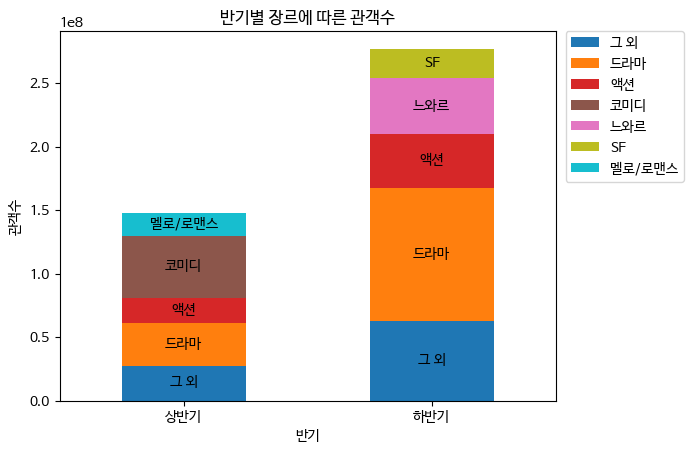

In [ ]:
ax = pivoth.plot(kind='bar', stacked=True, colormap='tab10')
plt.xlabel('반기')
plt.xticks(rotation=0)
plt.ylabel('관객수')
plt.title('반기별 장르에 따른 관객수')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
# iterate through the zipped containers and legend_labels
for c, l in zip(ax.containers, legend_labels):
  # customize the labels: only plot values greater than 0 and append the legend label
  labels = [f'{l}' if v.get_height() > 0 else '' for v in c]
  # add the bar annotation
  ax.bar_label(c, labels=labels, label_type='center', color='k', fontsize=10)

#### 분기별

In [ ]:
pivotq = pd.pivot_table(data=trainq, index=['quarter'], columns=['topngenre_q'],
                        values='box_off_num', aggfunc="sum")
pivotq.head()

topngenre_q,그 외,느와르,드라마,멜로/로맨스,액션,코미디
quarter,,,,,,
1,23502214.000,NaN,16780327.000,12740510.000,NaN,35044165.000
2,18576826.000,NaN,16932421.000,NaN,10187926.000,14107029.000
3,46333129.000,25523319.000,49294840.000,NaN,33920877.000,NaN
4,37498238.000,18673464.000,55269856.000,10523910.000,NaN,NaN


In [ ]:
pivotq.sum(axis=0).sort_values(ascending = False)

topngenre_q
드라마      138277444.000
그 외      125910407.000
코미디       49151194.000
느와르       44196783.000
액션        44108803.000
멜로/로맨스    23264420.000
dtype: float64

In [ ]:
pivotqsortedlist = pivotq.sum(axis=0).sort_values(ascending = False).index.tolist()
print(pivotqsortedlist)
pivotqsortedlist.remove('그 외')
pivotqsortedlist.insert(0, '그 외')
print(pivotqsortedlist)

['드라마', '그 외', '코미디', '느와르', '액션', '멜로/로맨스']
['그 외', '드라마', '코미디', '느와르', '액션', '멜로/로맨스']


In [ ]:
pivotq = pivotq.reindex(columns = pivotqsortedlist)
pivotq.head()

topngenre_q,그 외,드라마,코미디,느와르,액션,멜로/로맨스
quarter,,,,,,
1,23502214.000,16780327.000,35044165.000,NaN,NaN,12740510.000
2,18576826.000,16932421.000,14107029.000,NaN,10187926.000,NaN
3,46333129.000,49294840.000,NaN,25523319.000,33920877.000,NaN
4,37498238.000,55269856.000,NaN,18673464.000,NaN,10523910.000


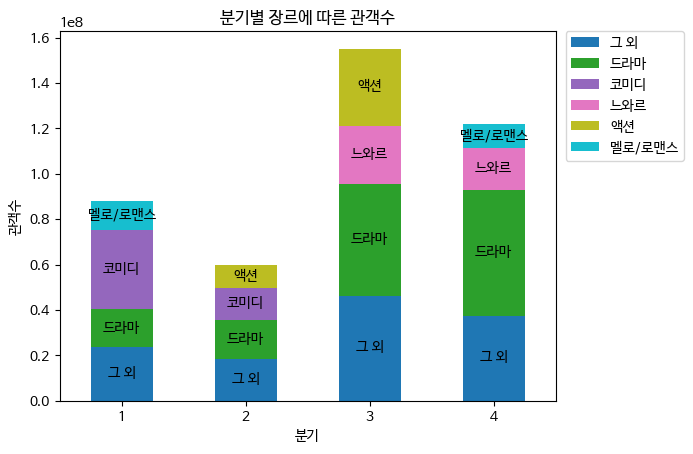

In [ ]:
ax = pivotq.plot(kind='bar', stacked=True, colormap='tab10')
plt.xlabel('분기')
plt.xticks(rotation=0)
plt.ylabel('관객수')
plt.title('분기별 장르에 따른 관객수')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
# iterate through the zipped containers and legend_labels
for c, l in zip(ax.containers, legend_labels):
  # customize the labels: only plot values greater than 0 and append the legend label
  labels = [f'{l}' if v.get_height() > 0 else '' for v in c]
  # add the bar annotation
  ax.bar_label(c, labels=labels, label_type='center', color='k', fontsize=10)

1, 4분기에만 멜로/로맨스가 상위 3 장르에 속한다는 걸 볼 수 있다. 이것이 연말 연초와 관련있는지 보기 위해 멜로/로맨스 장르 영화들을 뽑고 월별로 bar plot을 그려보겠다.

In [ ]:
temp = train[train['genre']=='멜로/로맨스']
romance_groupbym = temp.groupby('release_month').sum()
romance_groupbym['count'] = temp.groupby('release_month').count()['title']
romance_groupbym.reset_index(inplace=True)
romance_groupbym = romance_groupbym[['release_month','box_off_num','count']]
romance_groupbym_ordered = romance_groupbym.sort_values('box_off_num',ascending=False)
romance_groupbym_ordered

<ipython-input-202-03df18c53569>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  romance_groupbym = temp.groupby('release_month').sum()


,release_month,box_off_num,count
2,3,6598853,11
4,5,4608221,6
11,12,4456464,5
9,10,4140621,12
1,2,3952183,4
8,9,2708987,6
0,1,2189474,4
7,8,2062006,5
10,11,1926825,11
3,4,574543,9


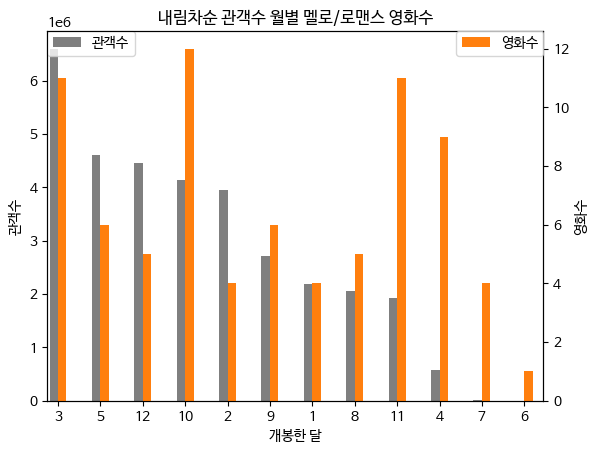

In [ ]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

bar1 = romance_groupbym_ordered.plot(kind='bar', x = 'release_month', y = 'box_off_num',
                     color='tab:gray', ax=ax, width=width, position=1,
                     label = '관객수',rot=0 )
bar2 = romance_groupbym_ordered.plot(kind='bar', x = 'release_month', y = 'count',
                     color='tab:orange', ax=ax2, width=width, position=0,
                     label = '영화수')
ax.set_xlabel('개봉한 달')
ax.set_ylabel('관객수')
ax.legend(loc='upper left', borderaxespad=0)
ax2.set_ylabel('영화수')
ax2.legend(loc='upper right', borderaxespad=0)
plt.title('내림차순 관객수 월별 멜로/로맨스 영화수')
plt.show()

예상과 달리 연말 연초에 멜로/로맨스가 개봉을 더 많이 하지도, 관객수가 제일 많지도 않았다.\
1분기에 포함되는 3월에 멜로 관객수가 가장 많았으며 개봉한 영화수도 제일 높았다. 두번째로는 5월에 멜로 관객수가 많았다.\
이는 멜로/로맨스는 연말/연초보다 벚꽃이 휘날리는 봄에 제일 인기가 많다고 생각해볼 수 있다.\
물론 크리스마스와 연말이 있는 12월은 세번째로 관객수가 많았지만 생각보다 개봉하는 멜로/로맨스 영화수는 적다.

### 5.4 관객수 상위 n 장르의 관객 점유율

#### 장르별 관객 점유율


In [ ]:
genre = train.groupby(['genre']).sum()
genre

<ipython-input-61-c7162dfa3cb3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre = train.groupby(['genre']).sum()


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,quarter
genre,,,,,,,,,
SF,1318,16096836.667,17,2565,48,23248494,26169,89,33
공포,4209,22674514.017,46,7408,163,24814966,84540,305,116
느와르,3115,20922763.333,35,8399,97,61119768,54347,175,68
다큐멘터리,8189,4299732.333,37,1660,304,6247020,187181,650,248
드라마,23128,81189587.333,180,36351,806,138277444,444787,1545,586
멜로/로맨스,7538,48035233.217,77,10591,266,33225507,157018,540,208
뮤지컬,535,0.000,0,11,14,33135,10064,46,17
미스터리,1744,9927827.367,21,1995,49,8968319,34226,127,46
서스펜스,224,534232.500,2,222,6,165222,4027,13,5


Text(0.5, 1.0, '장르별 관객 점유율')

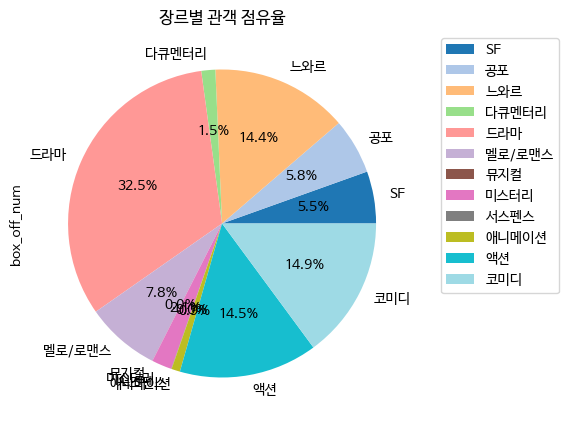

In [ ]:
plot = genre.plot.pie(y='box_off_num', figsize=(5, 5), colormap = "tab20", autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('장르별 관객 점유율')

드라마가 가장 관객 점유율이 높고 그다음으론 코미디, 액션, 느와르가 10%가 넘는다.\
관객수가 낮은 장르들은 파이 조각이 작아 확인하기 힘드니 상위 5개의 장르들을 뽑고 나머지 장르들을 "그 외"로 묶어 확인해보자

#### 관객수 상위 5 장르별 관객점유율

In [ ]:
genretop = train[['genre', 'box_off_num']].groupby(['genre']).sum().sort_values(by = 'box_off_num', ascending=False)
#genre_top5 = genre_top5.sort_values(by=['box_off_num'], ascending = False)[:5]
#genre_top5.loc[len(genre_top5.index)] = [train['box_off_num'].sum()-genre_top5['box_off_num'].sum()]
#genre_top5 = genre_top5.rename(index={5: '그 외'}, inplace=True)
genretop5 = genretop.reset_index()
genretop5 = genretop5[:5]
total = train['box_off_num'].sum()
top5total = genretop5['box_off_num'].sum()
rem = total-top5total
genretop5.loc[5] = ['그 외', rem]
genretop5

,genre,box_off_num
0,드라마,138277444
1,코미디,63277442
2,액션,61711274
3,느와르,61119768
4,멜로/로맨스,33225507
5,그 외,67297616


Text(0.5, 1.0, '상위 5 장르별 관객 점유율')

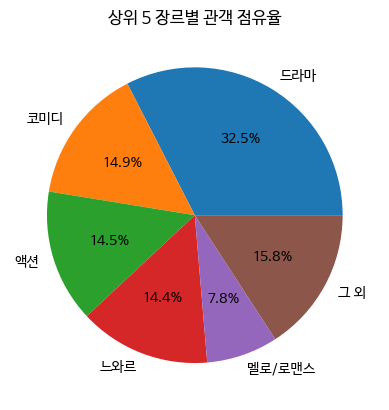

In [ ]:
fig, ax = plt.subplots()
labels = genretop5['genre'].tolist()
ax.pie(genretop5['box_off_num'], labels=labels, autopct='%1.1f%%')
plt.title('상위 5 장르별 관객 점유율')

#### 연도별

In [ ]:
year_bfprop = pivot.copy()
year_bfprop = year_bfprop.apply(lambda x: x/x.sum(), axis=1)
year_bfprop

topngenre_y,그 외,드라마,코미디,액션,느와르,SF,다큐멘터리
release_year,,,,,,,
2010,0.422,0.207,0.204,NaN,0.168,NaN,NaN
2011,0.261,0.219,0.279,0.241,NaN,NaN,NaN
2012,0.522,0.425,0.052,NaN,NaN,NaN,0.001
2013,0.341,0.332,0.144,0.183,NaN,NaN,NaN
2014,0.243,0.480,0.162,NaN,NaN,0.115,NaN
2015,0.361,0.194,NaN,0.250,0.195,NaN,NaN


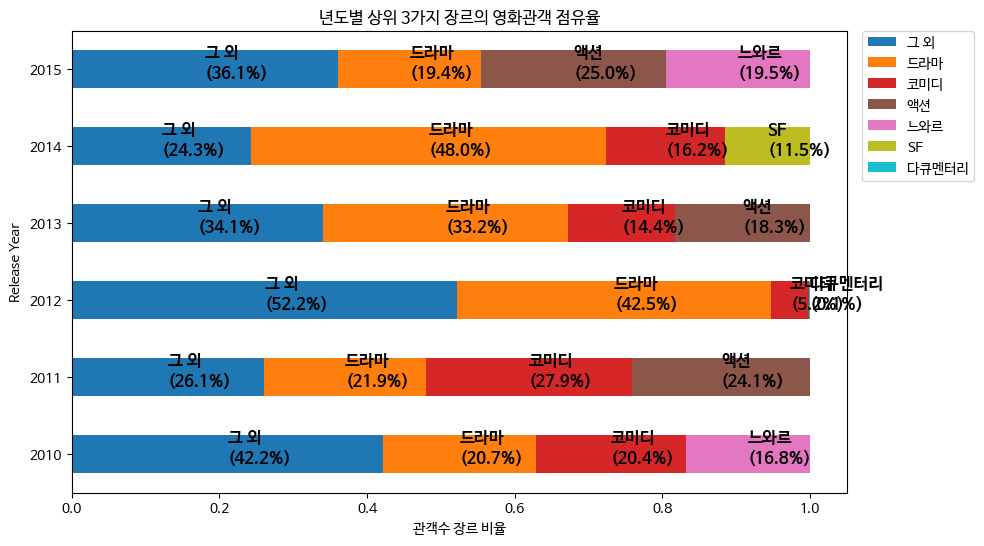

In [ ]:
ax = year_bfprop.plot(kind='barh', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Release Year")
plt.xlabel("관객수 장르 비율")
# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
for n, x in enumerate([*pivot.index.values]):
    for (proportion, y_loc, label) in zip(year_bfprop.loc[x],
                                                 year_bfprop.loc[x].cumsum(),
                                                 legend_labels):
      plt.text(x=(y_loc - proportion) + (proportion / 2),
              y=n - 0.11,
              s=f'{label}\n({np.round(proportion * 100, 1)}%)',
              color="black",
              fontsize=12,
              fontweight="bold")
plt.title('년도별 상위 3가지 장르의 영화관객 점유율')
plt.show()

#### 계절별

In [ ]:
season_bfprop = pivot2.copy()
season_bfprop = season_bfprop.apply(lambda x: x/x.sum(), axis=1)
season_bfprop

topngenre_s,그 외,드라마,코미디,느와르,액션,SF,멜로/로맨스
season,,,,,,,
봄,0.323,0.259,0.219,NaN,NaN,NaN,0.199
여름,0.327,NaN,NaN,0.203,0.304,0.167,NaN
가을,0.362,0.393,NaN,0.139,0.105,NaN,NaN
겨울,0.155,0.454,0.298,0.093,NaN,NaN,NaN


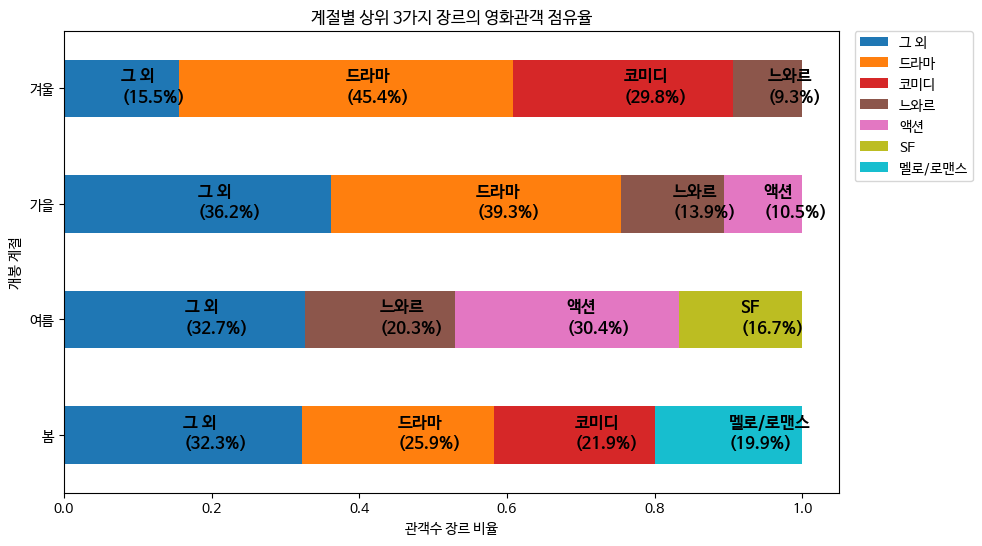

In [ ]:
ax = season_bfprop.plot(kind='barh', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("개봉 계절")
plt.xlabel("관객수 장르 비율")
# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
for n, x in enumerate([*pivot2.index.values]):
    for (proportion, y_loc, label) in zip(season_bfprop.loc[x],
                                                 season_bfprop.loc[x].cumsum(),
                                                 legend_labels):
      plt.text(x=(y_loc - proportion) + (proportion / 2),
              y=n - 0.11,
              s=f'{label}\n({np.round(proportion * 100, 1)}%)',
              color="black",
              fontsize=12,
              fontweight="bold")

plt.title('계절별 상위 3가지 장르의 영화관객 점유율')
plt.show()

#### 반기별

In [ ]:
half_bfprop = pivoth.copy()
half_bfprop = half_bfprop.apply(lambda x: x/x.sum(), axis=1)
half_bfprop

topngenre_h,그 외,드라마,액션,코미디,느와르,SF,멜로/로맨스
half-year,,,,,,,
상반기,0.186,0.228,0.132,0.332,NaN,NaN,0.121
하반기,0.227,0.377,0.152,NaN,0.160,0.084,NaN


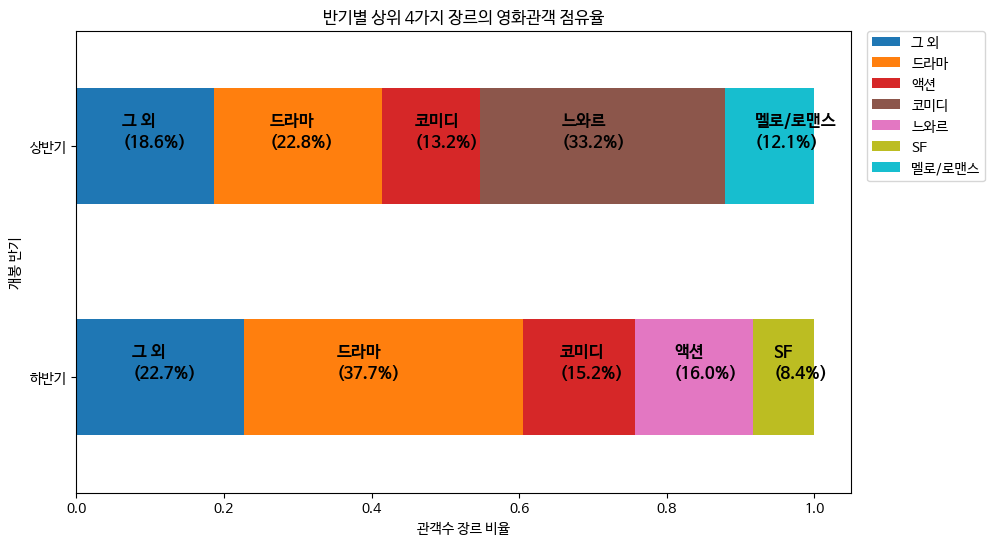

In [ ]:
half_bfprop.plot(kind='barh', stacked=True, colormap='tab10', figsize=(10, 6)).invert_yaxis()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("개봉 반기")
plt.xlabel("관객수 장르 비율")
# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
for n, x in enumerate([*pivoth.index.values]):
    for (proportion, y_loc, label) in zip(half_bfprop.loc[x],
                                          half_bfprop.loc[x].cumsum(),
                                          legend_labels):
      plt.text(x=(y_loc - proportion) + (proportion / 3),
              y=n,
              s=f'{label}\n({np.round(proportion * 100, 1)}%)',
              color="black",
              fontsize=12,
              fontweight="bold")
plt.title('반기별 상위 4가지 장르의 영화관객 점유율')
plt.show()

#### 분기별

In [ ]:
quarter_bfprop = pivotq.copy()
quarter_bfprop = quarter_bfprop.apply(lambda x: x/x.sum(), axis=1)
quarter_bfprop

topngenre_q,그 외,드라마,코미디,느와르,액션,멜로/로맨스
quarter,,,,,,
1,0.267,0.191,0.398,NaN,NaN,0.145
2,0.311,0.283,0.236,NaN,0.170,NaN
3,0.299,0.318,NaN,0.165,0.219,NaN
4,0.307,0.453,NaN,0.153,NaN,0.086


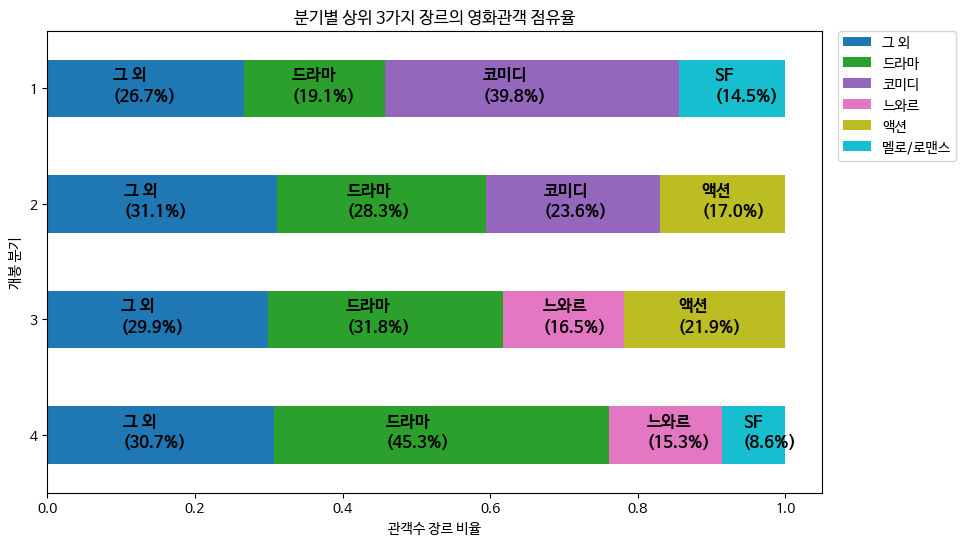

In [ ]:
quarter_bfprop.plot(kind='barh', stacked=True, colormap='tab10', figsize=(10, 6)).invert_yaxis()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("개봉 분기")
plt.xlabel("관객수 장르 비율")
# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()
for n, x in enumerate([*pivotq.index.values]):
    for (proportion, y_loc, label) in zip(quarter_bfprop.loc[x],
                                                 quarter_bfprop.loc[x].cumsum(),
                                                 legend_labels):
      plt.text(x=(y_loc - proportion) + (proportion / 3),
              y=n+0.1,
              s=f'{label}\n({np.round(proportion * 100, 1)}%)',
              color="black",
              fontsize=12,
              fontweight="bold")
plt.title('분기별 상위 3가지 장르의 영화관객 점유율')
plt.show()

# director와 box_off_num


In [ ]:
top10_dir_prev_num_index = train.sort_values(by=['dir_prev_num'], ascending = False).head(10).index

In [ ]:
top10_dir_prev_num = train.iloc[top10_dir_prev_num_index]
top10_dir_prev_num

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
132,나의 독재자,롯데엔터테인먼트,드라마,2014-10-30,127,15세 관람가,이해준,604486.00,5,459,2,386074
174,위험한 상견례 2,롯데엔터테인먼트,멜로/로맨스,2015-04-29,119,15세 관람가,김진영,809760.80,5,372,5,472695
356,경성학교: 사라진 소녀들,롯데엔터테인먼트,미스터리,2015-06-18,99,15세 관람가,이해영,917362.20,5,284,3,356436
103,퇴마: 무녀굴,씨네그루(주)키다리이엔티,공포,2015-08-20,105,15세 관람가,김휘,2043525.60,5,360,6,120806
307,당신은 아름답다,마운틴 픽처스,다큐멘터리,2010-08-26,75,전체 관람가,백승창,481459.25,4,0,1,240
431,투혼,시너지,드라마,2011-10-06,124,전체 관람가,김상진,3907784.50,4,335,4,210970
67,열정같은소리하고있네,(주)NEW,드라마,2015-11-25,106,15세 관람가,정기훈,1502930.25,4,341,2,654407
322,히말라야,CJ 엔터테인먼트,드라마,2015-12-16,124,12세 관람가,이석훈,3549473.00,4,520,2,7759711
81,심야의 FM,롯데엔터테인먼트,공포,2010-10-14,106,청소년 관람불가,김상만,1205200.25,4,344,2,1208310
360,쎄시봉,CJ 엔터테인먼트,멜로/로맨스,2015-02-05,122,15세 관람가,김현석,1468215.75,4,566,8,1715370


<Axes: xlabel='director', ylabel='box_off_num'>

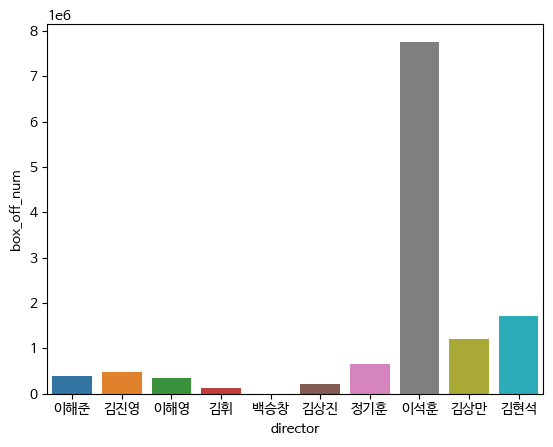

In [ ]:
sns.barplot(data=top10_dir_prev_num, x='director', y='box_off_num')
# dir_prev_num bar plot 추가하기

In [ ]:
director = train.groupby(['director']).sum()
director

<ipython-input-17-77e928c5d946>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director = train.groupby(['director']).sum()


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
director,,,,,,
New Pistol,88,0.000000e+00,0,48,8,2595
강석필,95,0.000000e+00,0,18,4,8695
강성옥,73,0.000000e+00,0,0,2,17912
강우석,316,8.448210e+05,3,688,14,5094896
강의석,62,0.000000e+00,0,3,2,152
...,...,...,...,...,...,...
황석호,76,0.000000e+00,0,3,2,1068
황욱,101,0.000000e+00,0,58,5,1504
황유식,93,5.064190e+05,2,54,2,480


In [ ]:
top10_directors = train.groupby(['director']).sum().sort_values(by=['box_off_num'], ascending = False)[:10]
top10_directors.reset_index(inplace=True)
top10_directors

<ipython-input-26-f3638426acd8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_directors = train.groupby(['director']).sum().sort_values(by=['box_off_num'], ascending = False)[:10]


,director,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,최동훈,274,7.734171e+06,7,1090,13,25690504
1,이석훈,254,5.393368e+06,7,1388,4,16425919
2,윤제균,126,0.000000e+00,0,869,4,14262766
3,추창민,249,3.105082e+06,4,706,7,13973002
4,이환경,260,1.638099e+06,4,392,12,13347092
5,우민호,539,5.305814e+06,6,1431,16,11480550
6,강형철,271,1.606187e+07,3,1155,15,11469079
7,양우석,127,0.000000e+00,0,311,5,11374879
8,류승완,239,0.000000e+00,0,834,9,9889560
9,봉준호,125,0.000000e+00,0,67,10,9350351


<Axes: xlabel='director', ylabel='box_off_num'>

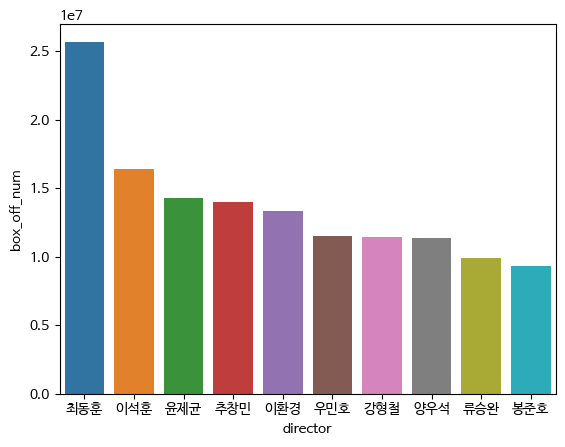

In [ ]:
sns.barplot(data=top10_directors, x='director', y='box_off_num')

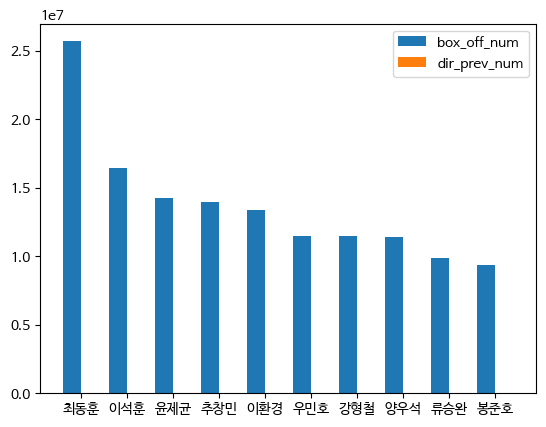

In [ ]:
X = top10_directors['director']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, top10_directors['box_off_num'], 0.4, label = 'box_off_num')
plt.bar(X_axis + 0.2, top10_directors['dir_prev_num'], 0.4, label = 'dir_prev_num')
#diff scale -> axis 1 & axis 2

plt.xticks(X_axis, X)
#plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [ ]:
#top10_dir_prev_num1 = top10_dir_prev_num.assign(director_prev =lambda x: x.director * x.dir_prev_num / 100)
#print(df1)

TypeError: ignored

In [ ]:
genre = train.groupby(['genre']).sum()
genre

<ipython-input-381-c7162dfa3cb3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre = train.groupby(['genre']).sum()


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,quarter
genre,,,,,,,,,
SF,1318,16096836.667,17,2565,48,23248494,26169,89,33
공포,4209,22674514.017,46,7408,163,24814966,84540,305,116
느와르,3115,20922763.333,35,8399,97,61119768,54347,175,68
다큐멘터리,8189,4299732.333,37,1660,304,6247020,187181,650,248
드라마,23128,81189587.333,180,36351,806,138277444,444787,1545,586
멜로/로맨스,7538,48035233.217,77,10591,266,33225507,157018,540,208
뮤지컬,535,0.000,0,11,14,33135,10064,46,17
미스터리,1744,9927827.367,21,1995,49,8968319,34226,127,46
서스펜스,224,534232.500,2,222,6,165222,4027,13,5


Text(0.5, 1.0, '장르별 관객 점유율')

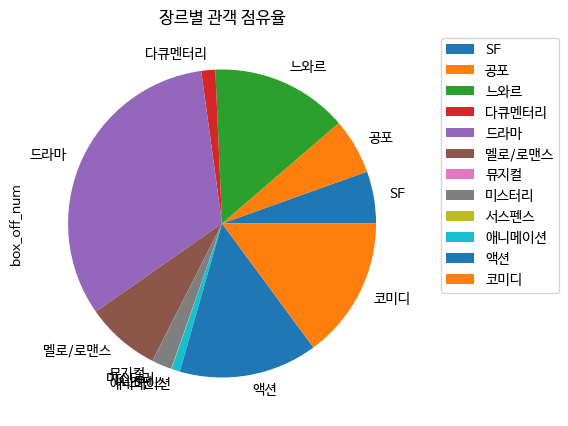

In [ ]:
plot = genre.plot.pie(y='box_off_num', figsize=(5, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('장르별 관객 점유율')

In [ ]:
genretop = train[['genre', 'box_off_num']].groupby(['genre']).sum().sort_values(by = 'box_off_num', ascending=False)
#genre_top5 = genre_top5.sort_values(by=['box_off_num'], ascending = False)[:5]
#genre_top5.loc[len(genre_top5.index)] = [train['box_off_num'].sum()-genre_top5['box_off_num'].sum()]
#genre_top5 = genre_top5.rename(index={5: '그 외'}, inplace=True)
genretop5 = genretop.reset_index()
genretop5 = genretop5[:5]
total = train['box_off_num'].sum()
top5total = genretop5['box_off_num'].sum()
rem = total-top5total
genretop5.loc[5] = ['그 외', rem]
genretop5

,genre,box_off_num
0,드라마,138277444
1,코미디,63277442
2,액션,61711274
3,느와르,61119768
4,멜로/로맨스,33225507
5,그 외,67297616


Text(0.5, 1.0, '상위 5 장르별 관객 점유율')

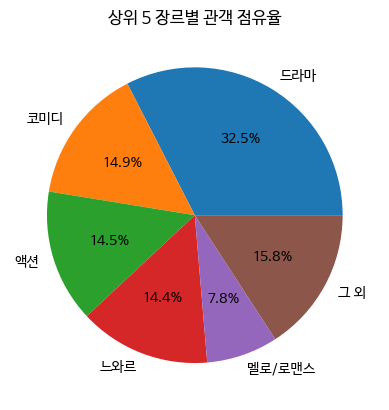

In [ ]:
fig, ax = plt.subplots()
labels = genretop5['genre'].tolist()
ax.pie(genretop5['box_off_num'], labels=labels, autopct='%1.1f%%')
plt.title('상위 5 장르별 관객 점유율')
